In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [7]:
def get_smoke_count(smoking_status):
    mask=df['smoking_status']==smoking_status
    return df[mask]

In [8]:
get_smoke_count('Unknown')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [9]:
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [10]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
null_values = df['bmi'].isnull().sum()
null_values

201

In [12]:
null_percentage = df['bmi'].isnull().mean()*100
null_percentage

3.9334637964774952

In [13]:
column_mean = df['bmi'].mean()
df['bmi'].fillna(column_mean, inplace=True)

In [14]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [15]:
columns = ['gender','ever_married','work_type', 'Residence_type','smoking_status']

for col in columns:
    unique_values = df[col].unique()
    print(f"Unique values for{col}:{unique_values}")

Unique values forgender:['Male' 'Female' 'Other']
Unique values forever_married:['Yes' 'No']
Unique values forwork_type:['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values forResidence_type:['Urban' 'Rural']
Unique values forsmoking_status:['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [16]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [17]:
# In gender column there is only one value for other so we replace it with male
df['gender'] = df['gender'].replace('Other', 'Male')

In [18]:
df['gender'].value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

In [19]:
mask1 = df[['gender','ever_married','work_type', 'Residence_type','smoking_status']].nunique()
mask1

gender            2
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


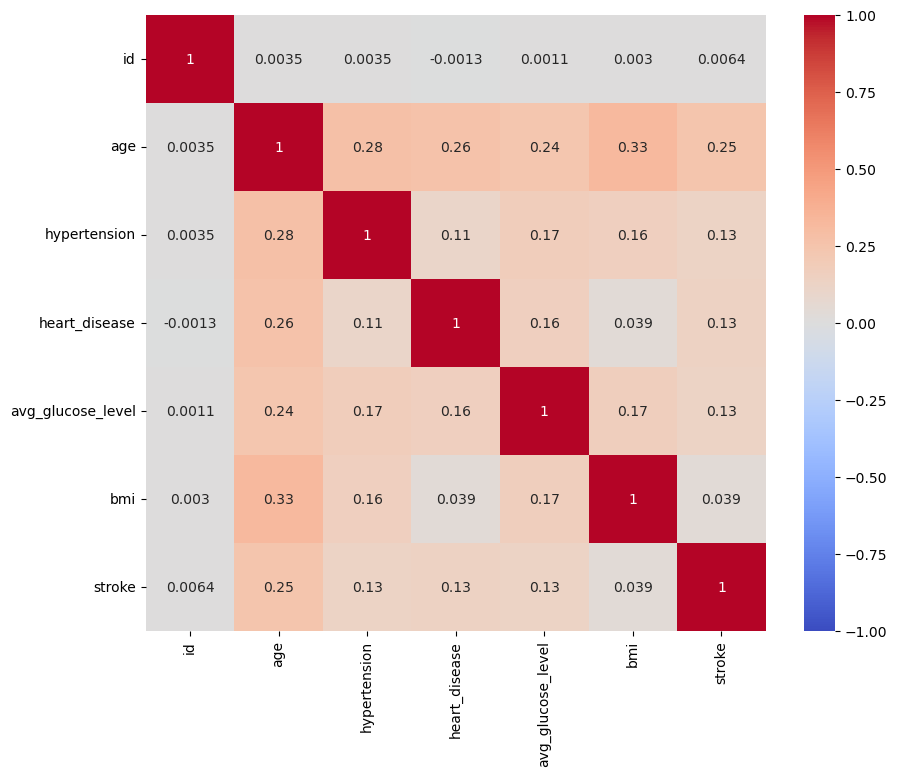

In [21]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True,vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

# Feature Engineering

In [22]:
# Creating age group categories

print(f'maximum age variable: {df["age"].max()}')
print(f'minimum age variable: {df["age"].min()}')
print(f'Number of age variable: {df["age"].nunique()}')

maximum age variable: 82.0
minimum age variable: 0.08
Number of age variable: 104


In [23]:
# collapse age group categories
ranges = [0,13,18,45,60,100]
group_names = ['Children','Teens','Adults','Mid-adults','Elderly']
df['age_group'] = pd.cut(df['age'],bins=ranges,labels=group_names)
df['age_group'].unique()

['Elderly', 'Mid-adults', 'Adults', 'Children', 'Teens']
Categories (5, object): ['Children' < 'Teens' < 'Adults' < 'Mid-adults' < 'Elderly']

In [24]:
# For BMI

print(f'maximum age variable: {df["bmi"].max()}')
print(f'minimum age variable: {df["bmi"].min()}')
print(f'Number of age variable: {df["bmi"].nunique()}')

maximum age variable: 97.6
minimum age variable: 10.3
Number of age variable: 419


In [25]:
# collapse bmi into fewer groups

ranges = [0,19,25,30,100]
group_names = ['Underweight', 'Normal', 'Overweight', 'Obesity']
df['bmi_group'] = pd.cut(df['bmi'],bins=ranges,labels=group_names)
df['bmi_group'].unique()

['Obesity', 'Overweight', 'Normal', 'Underweight']
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obesity']

In [26]:
# for avg glucose level

print(f'maximum age variable: {df["avg_glucose_level"].max()}')
print(f'minimum age variable: {df["avg_glucose_level"].min()}')
print(f'Number of age variable: {df["avg_glucose_level"].nunique()}')

maximum age variable: 271.74
minimum age variable: 55.12
Number of age variable: 3979


In [27]:
ranges = [0, 70, 99, 125, 280]
group_names = ['Low', 'Normal', 'High', 'Very_high']
df['avg_glucose_level_group'] = pd.cut(df['avg_glucose_level'],bins=ranges,labels=group_names)
df['avg_glucose_level_group'].unique()

['Very_high', 'High', 'Normal', 'Low']
Categories (4, object): ['Low' < 'Normal' < 'High' < 'Very_high']

# Exploratory data analysis(EDA)

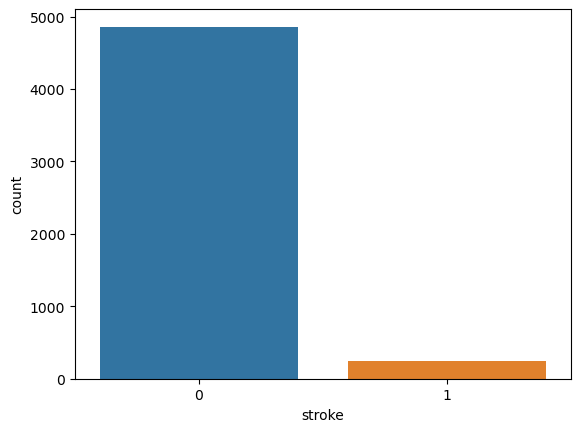

In [28]:
sns.countplot(x='stroke',data=df)
plt.show()

In [29]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group,avg_glucose_level_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Elderly,Obesity,Very_high
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Elderly,Overweight,Very_high
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Elderly,Obesity,High
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Mid-adults,Obesity,Very_high
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Elderly,Normal,Very_high


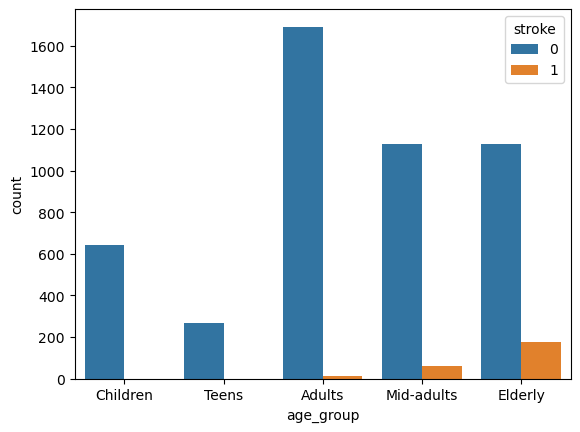

In [30]:
sns.countplot(x='age_group',hue='stroke',data=df)
plt.show()

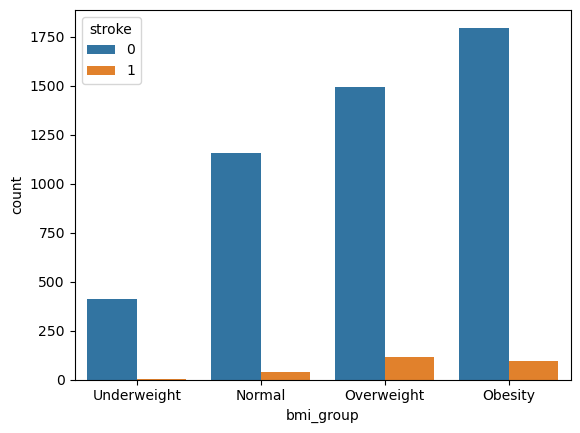

In [31]:
sns.countplot(x='bmi_group',hue='stroke',data=df)
plt.show()

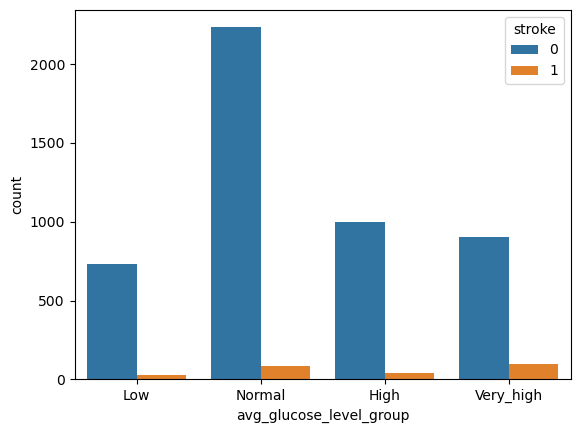

In [32]:
sns.countplot(x='avg_glucose_level_group',hue='stroke',data=df)
plt.show()

<AxesSubplot:xlabel='heart_disease', ylabel='age'>

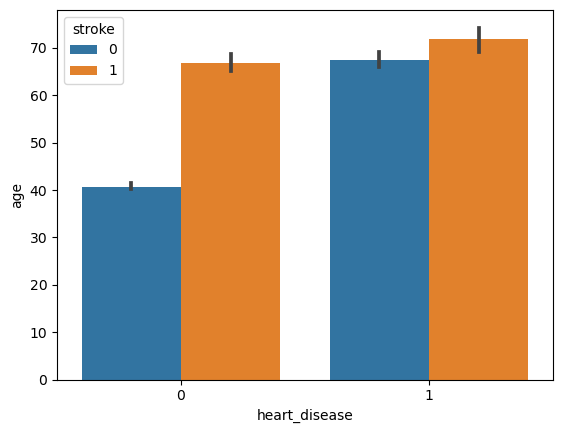

In [33]:
sns.barplot(x='heart_disease',y='age',data=df,hue='stroke')

In [34]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group,avg_glucose_level_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Elderly,Obesity,Very_high
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Elderly,Overweight,Very_high
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Elderly,Obesity,High
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Mid-adults,Obesity,Very_high
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Elderly,Normal,Very_high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,Elderly,Overweight,Normal
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Elderly,Obesity,Very_high
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Adults,Obesity,Normal
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,Mid-adults,Overweight,Very_high


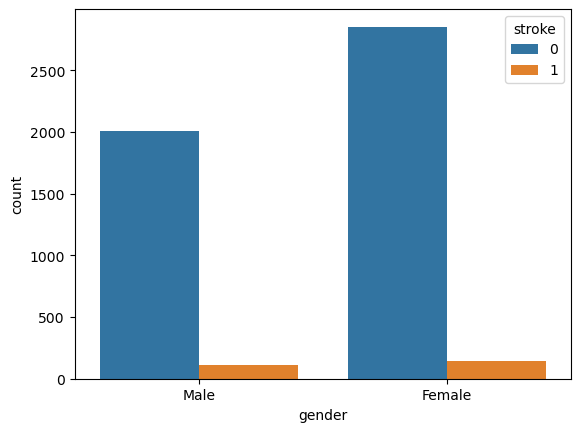

In [35]:
sns.countplot(x='gender',hue='stroke',data=df)
plt.show()

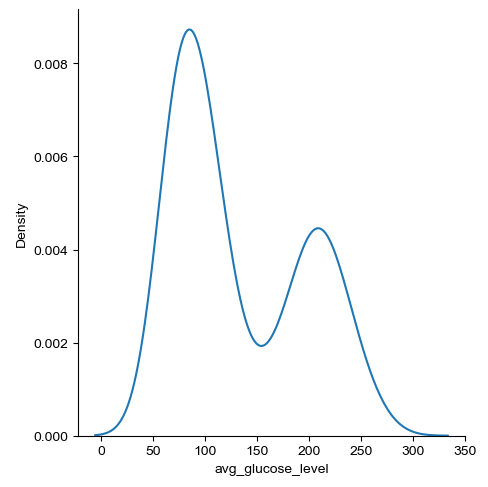

In [36]:
stroke = df[df['stroke']==1]
sns.displot(stroke['avg_glucose_level'], kind='kde')
sns.set_style('darkgrid')
plt.show()

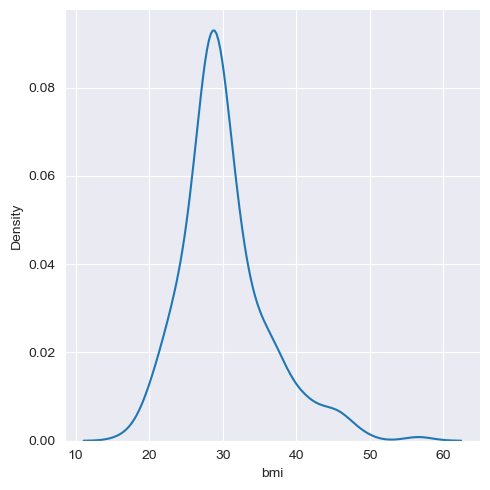

In [37]:
stroke = df[df['stroke']==1]
sns.displot(stroke['bmi'], kind='kde')
sns.set_style('darkgrid')
plt.show()

# Preprocessing

### Binary Encoding

In [38]:
#Instantiate LabelEncoder
labelencoder = LabelEncoder()

#Binary Encoding(encoding object columns with 2 unique values)
binary_cols =  ['ever_married', 'Residence_type', 'gender']
for col in binary_cols:
    df[col]=labelencoder.fit_transform(df[col])

### Label Encoding

In [39]:
categorical_cols = ['age_group', 'bmi_group', 'avg_glucose_level_group']

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

## One hot encoding

In [40]:
#Encode object columns that more than 2 unique values
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)

In [41]:
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group,bmi_group,avg_glucose_level_group,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,2,1,3,0,1,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,2,2,3,0,0,1,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,2,1,0,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,3,1,3,0,1,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,2,0,3,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,28.893237,0,2,2,2,0,1,0,0,0,1,0
5106,44873,0,81.0,0,0,1,1,125.20,40.000000,0,2,1,3,0,0,1,0,0,1,0
5107,19723,0,35.0,0,0,1,0,82.99,30.600000,0,0,1,2,0,0,1,0,0,1,0
5108,37544,1,51.0,0,0,1,0,166.29,25.600000,0,3,2,3,0,1,0,0,1,0,0


In [42]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#### It looks like our data is imbalanced, so we have to resample it.

In [43]:
# handle Imbalance data
stroke_0=df[df['stroke']==0]
stroke_1=df[df['stroke']==1]

In [44]:
# resample
from sklearn.utils import resample
df_upsampled=resample(stroke_1,replace=True,n_samples=4700)

In [45]:
new_df=pd.concat([stroke_0,df_upsampled])
from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [46]:
new_df['stroke'].value_counts()

0    4861
1    4700
Name: stroke, dtype: int64

In [47]:
X = new_df.drop(columns =['id','stroke'])
y= new_df['stroke']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6692, 18)
(2869, 18)
(6692,)
(2869,)


In [49]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
# fit the scaler to the train set, it will learn parameters
Scaler.fit(X_train)

#transform train and test set

X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)

### Now lets compare accuracy using Different Algorithms

# 1) Logistic Regression

In [50]:
logistic_reg = LogisticRegression()

In [51]:
logistic_reg.fit(X_train, y_train)

C:\Users\omkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_pred = logistic_reg.predict(X_test)

In [53]:
log_reg_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {log_reg_accuracy}")

Accuracy: 0.7856395956779365


#### lets evaluate Accuracy of  model

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1414
           1       0.76      0.84      0.80      1455

    accuracy                           0.79      2869
   macro avg       0.79      0.78      0.78      2869
weighted avg       0.79      0.79      0.78      2869



#### sample explaination
![](https://i.stack.imgur.com/Wsz2t.png)

# 2) Decision Tree

In [55]:
# Create the Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()

In [56]:
# Train the classifier on the training data
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
# Make predictions on the test set
y_pred = decision_tree_classifier.predict(X_test)

In [58]:
# Calculate the accuracy of the classifier
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {dt_accuracy}")

Accuracy: 0.9700243987452074


# Visualization Of  Decision Tree

In [59]:
from sklearn.tree import plot_tree, export_text

In [60]:
plt.figure(figsize=(8,10))
plot_tree(decision_tree_classifier, feature_names=X.columns,class_names=True, filled=True);-

SyntaxError: invalid syntax (427452155.py, line 2)

#### lets evaluate Accuracy of model

In [61]:
predictions = decision_tree_classifier.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1414
           1       0.94      1.00      0.97      1455

    accuracy                           0.97      2869
   macro avg       0.97      0.97      0.97      2869
weighted avg       0.97      0.97      0.97      2869



# 3) Random forest Classifier

In [62]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy}")

Accuracy: 0.9895433949111189


# Visualization Of Random Forest

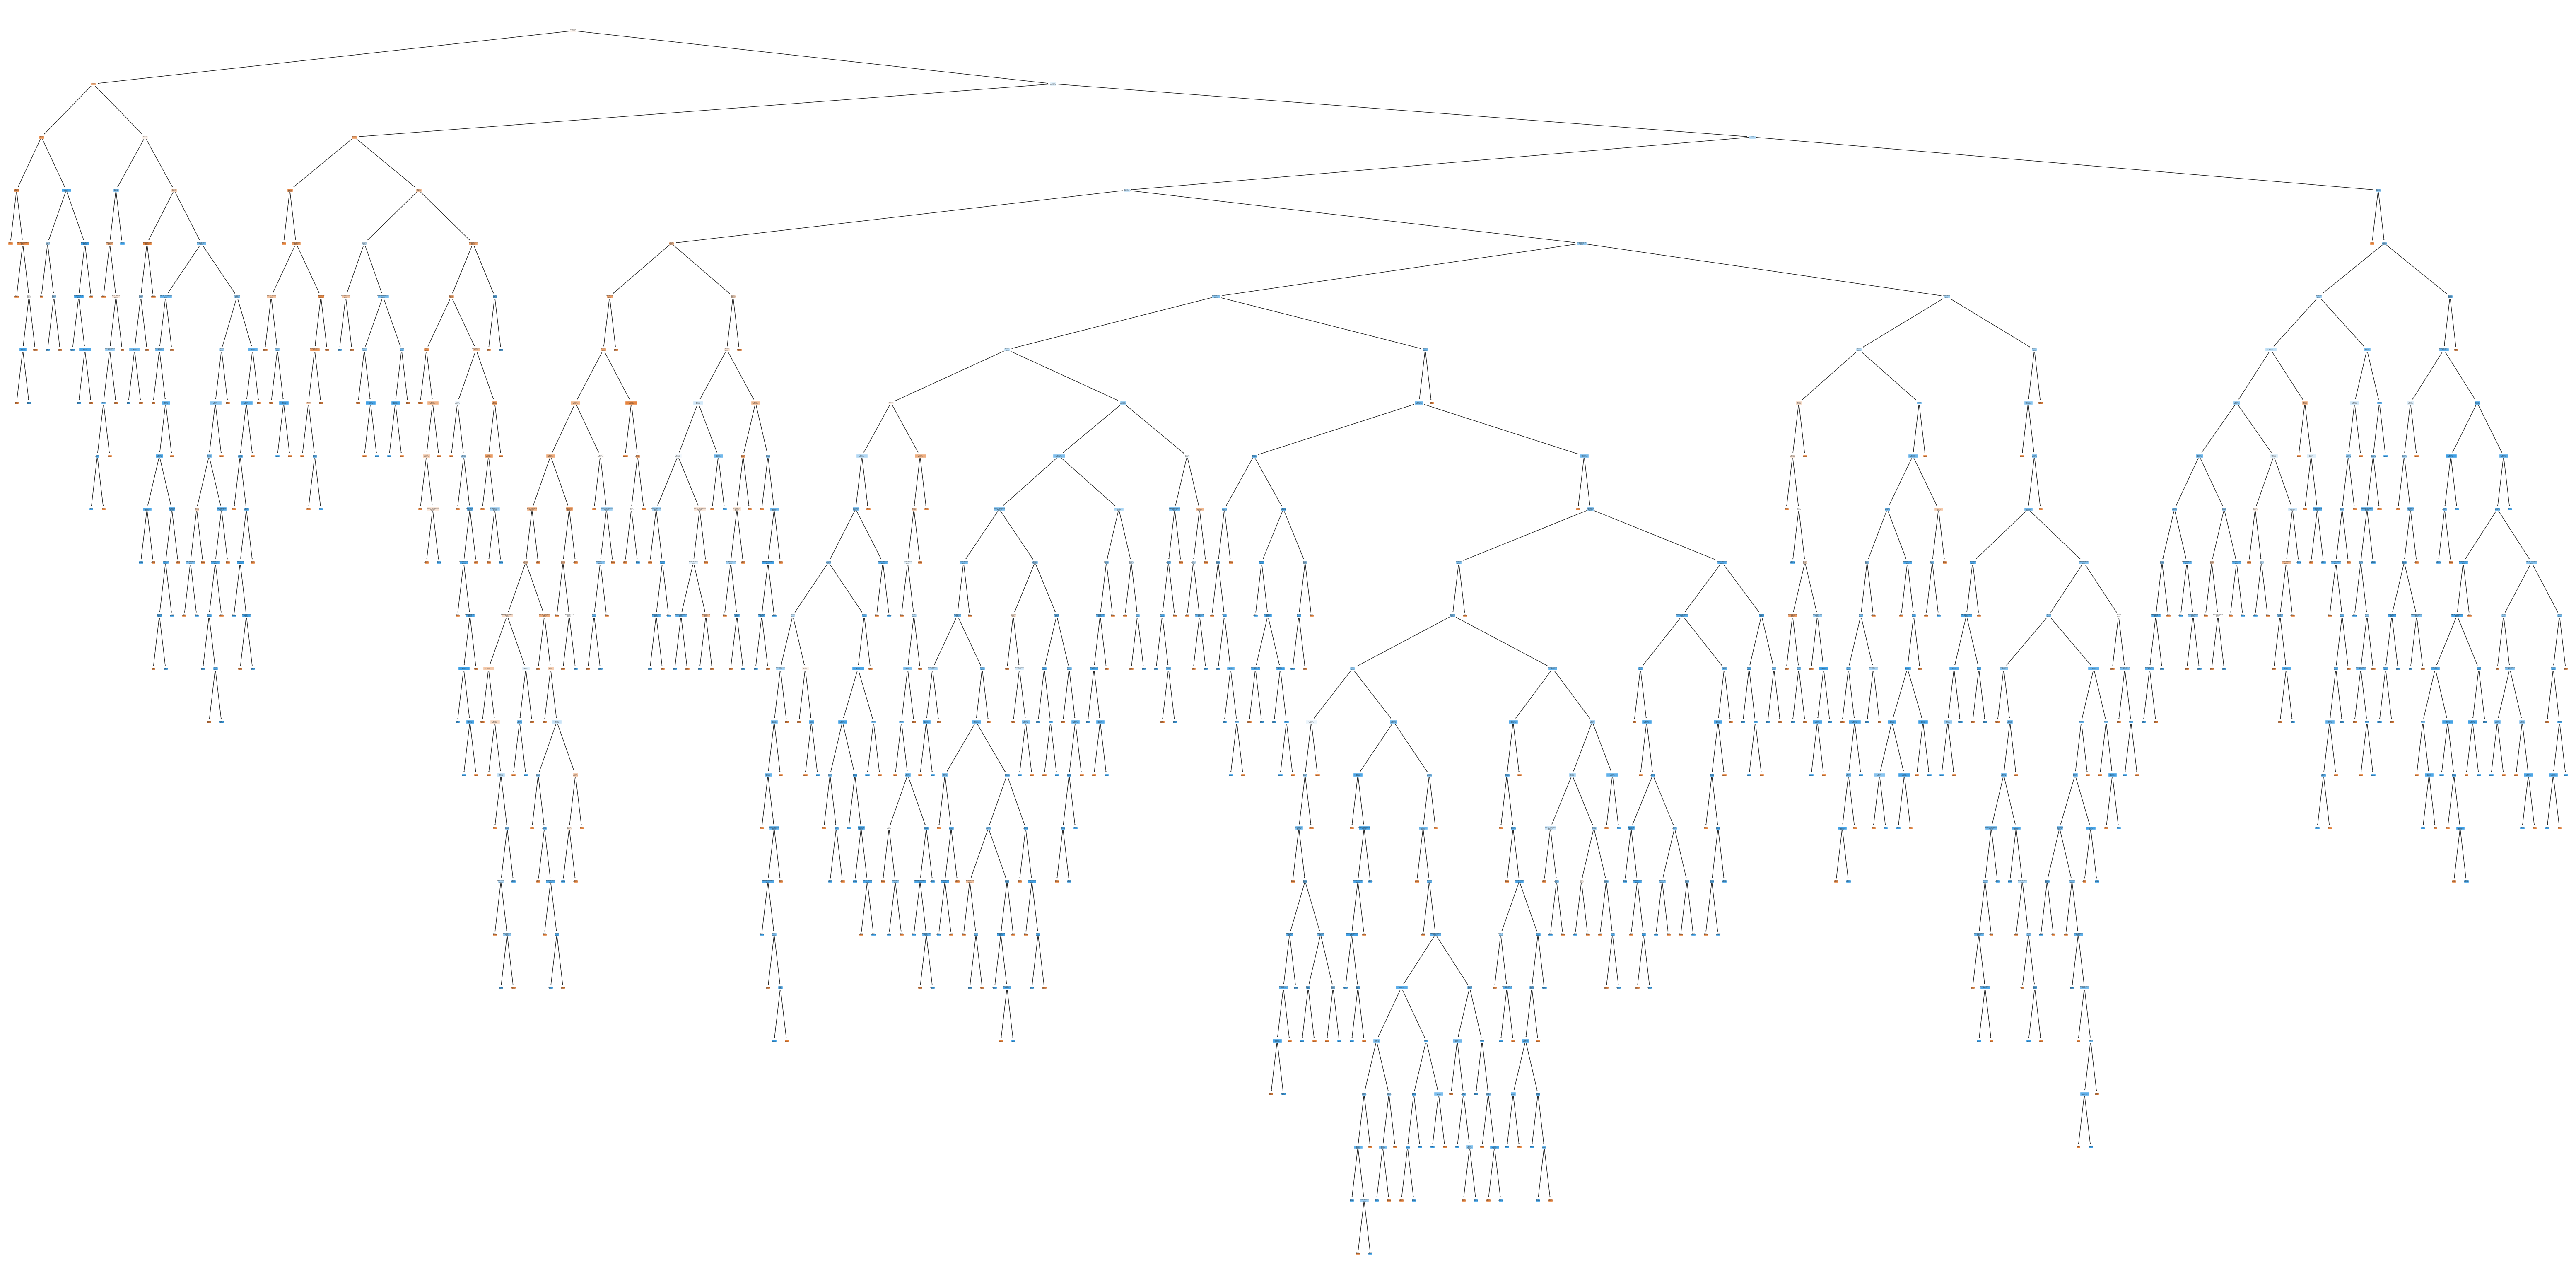

In [63]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_classifier.estimators_[0], feature_names = X.columns,class_names=True,filled=True);

##### lets evaluate Accuracy of model

In [64]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1384   30]
 [   0 1455]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1414
           1       0.98      1.00      0.99      1455

    accuracy                           0.99      2869
   macro avg       0.99      0.99      0.99      2869
weighted avg       0.99      0.99      0.99      2869



## Hyperparameter Tunning By GridSearchCV Method.

In [65]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [66]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, scoring="f1_weighted")

In [ ]:

grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.cv_results_ 

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

In [ ]:
rf_best.score(X_train,y_train)

In [ ]:
rf_best.score(X_test,y_test)

In [ ]:
yhat = rf_best.predict(X_test)

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
plt.figure(figsize=(12,6))
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Stroke=1','Stroke=0'],yticklabels=['Stroke=1','churn=0'], cmap='Blues', square=True);
plt.xlabel('Predicted label');
plt.ylabel('True label');
plt.title('Confusion matrix');

In [ ]:
print(confusion_matrix(y_test,yhat))
print(classification_report(y_test,yhat))

# Feature Importance

In [ ]:
rf_best.feature_importances_

In [ ]:
X.columns

In [ ]:
imp_df = pd.DataFrame({
    "Features": X.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

In [ ]:
import shap

In [ ]:
model =RandomForestClassifier() 

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for the positive class (class index 1)
shap.summary_plot(shap_values[1], X_test)



"""Positive SHAP Value (Red): When a feature's value is high (farther to the right on the x-axis) and contributes to increasing the model's prediction, it will have a positive SHAP value. The color of the bar will be in shades of red, with brighter red indicating higher positive values.

Negative SHAP Value (Blue): When a feature's value is low (closer to the left on the x-axis) and contributes to decreasing the model's prediction, it will have a negative SHAP value. The color of the bar will be in shades of blue, with brighter blue indicating higher negative values.

Here's how to interpret the plot:

Feature Order: Features are ordered vertically based on their average absolute SHAP values. Features with the most significant impact on the model's predictions are at the top.

Feature Importance: Longer bars indicate features that have a stronger impact on the model's predictions. The direction of the bar (left or right) indicates whether the feature contributes positively or negatively to the prediction."""

# Deployment & Prediction

**Deploying a machine learning model involves making the model accessible for making predictions on new data. Here's an overview of the steps and some example code snippets for deploying a machine learning model using a web application and a REST API. For this example, I'll use Flask, a popular web framework for Python.**

**Step 1: Prepare Your Model**

**Assuming you have a trained and tuned model, you need to save it to a file using a serialization technique like joblib or pickle.**

In [ ]:
pip install pickle

**Step 2: Create a Web Application Using Flask**

**You'll create a simple web application using Flask to expose an API endpoint that can receive input data and return predictions from your model.**

In [ ]:
pip install joblib

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Create and fit your RandomForestClassifier
rf_best = RandomForestClassifier()
rf_best.fit(X_train, y_train)

# Save the model to a binary file
joblib.dump(rf_best, 'best_model.pkl')


In [ ]:
import joblib

# Load the saved best model
loaded_model = joblib.load('best_model.pkl')

# Now you can use "loaded_model" for predictions
loaded_model

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the trained model
model = joblib.load('Stroke.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.json
        # Assuming "data" contains the features for prediction
        prediction = model.predict([data])
        return jsonify({'prediction': prediction[0]})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)


**Step 3: Send Requests to the API**

**You can now use the deployed API to make predictions by sending POST requests with the input data.**

In [ ]:
import requests

data = {'healthcare-dataset-stroke-data.csv'
    # Your input data here
}

response = requests.post(' http://127.0.0.1:5000/predict', jsonify=data)
result = response.jsonify()

print('Prediction:', result['prediction'])


**Step 4: Deployment**

**To deploy this web application, you would typically follow these steps:**

**Set up a production environment (e.g., a server or cloud platform).
Install required dependencies, including Flask and any other libraries you're using.
Copy your model file (model.pkl) to the deployment environment.
Run the Flask app in production mode, which might involve using tools like Gunicorn or uWSGI.
Please note that this is a basic example for educational purposes. In a production scenario, you would also need to consider security, scalability, and other factors. Additionally, you might want to explore platforms like AWS, Azure, or Heroku for deploying machine learning models more robustly.**




